In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

#### Load Data

In [2]:
data = np.load('ORL_faces.npz')
data.files

['testY', 'testX', 'trainX', 'trainY']

#### Preprocess data

In [3]:
x_train = np.array(data['trainX'], dtype='float32') / 255
x_test = np.array(data['testX'], dtype='float32') / 255
y_train = data['trainY']
y_test = data['testY']

In [4]:
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.05)

#### Reshape Data

In [5]:
input_shape = (112, 92, 1)
x_train = x_train.reshape(x_train.shape[0], *input_shape)
x_test = x_test.reshape(x_test.shape[0], *input_shape)
x_valid = x_valid.reshape(x_valid.shape[0], *input_shape)

#### Bulid the model

In [6]:
model = Sequential([
    Conv2D(filters=36, kernel_size=7, activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=54, kernel_size=5, activation='relu'),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(2024, activation='relu'),
    Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(20, activation='softmax')  
])

In [7]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [8]:
history = model.fit(
    x_train, y_train,
    epochs=100, batch_size=512,
    validation_data=(x_valid, y_valid),
)

Epoch 1/100
1/1 [==============================] - 12s 12s/step - loss: 3.0234 - accuracy: 0.0526 - val_loss: 3.0425 - val_accuracy: 0.0833
Epoch 2/100
1/1 [==============================] - 6s 6s/step - loss: 3.4200 - accuracy: 0.0614 - val_loss: 3.0247 - val_accuracy: 0.0000e+00
Epoch 3/100
1/1 [==============================] - 5s 5s/step - loss: 3.0592 - accuracy: 0.0526 - val_loss: 2.9959 - val_accuracy: 0.0000e+00
Epoch 4/100
1/1 [==============================] - 5s 5s/step - loss: 2.9899 - accuracy: 0.0614 - val_loss: 2.9950 - val_accuracy: 0.0000e+00
Epoch 5/100
1/1 [==============================] - 5s 5s/step - loss: 2.9910 - accuracy: 0.0570 - val_loss: 2.9947 - val_accuracy: 0.0833
Epoch 6/100
1/1 [==============================] - 5s 5s/step - loss: 2.9907 - accuracy: 0.0526 - val_loss: 2.9885 - val_accuracy: 0.0000e+00
Epoch 7/100
1/1 [==============================] - 3s 3s/step - loss: 2.9775 - accuracy: 0.0526 - val_loss: 2.9779 - val_accuracy: 0.0000e+00
Epoch 8/100


#### Evaluate the model

In [9]:
y_pred = np.argmax(model.predict(x_test), axis=1)
print('Predicted Labels:', y_pred[:50])
print('True Labels:', y_test[:50])
print(classification_report(y_test, y_pred))

5/5 [==============================] - 2s 134ms/step
Predicted Labels: [ 0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2
  3  3  3  3  3  3  3  3  4  8  8 17  4  8  4 17  5  5  5  5  5  5  5  5
  6  6]
True Labels: [0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 4 4 4 4 4
 4 4 4 5 5 5 5 5 5 5 5 6 6]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         8
           4       1.00      0.38      0.55         8
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         8
           7       0.67      1.00      0.80         8
           8       0.73      1.00      0.84         8
           9       1.00      0.75      0.86         8
          10       1.00      1.00      1.00         8
          

#### Plot accuracy history

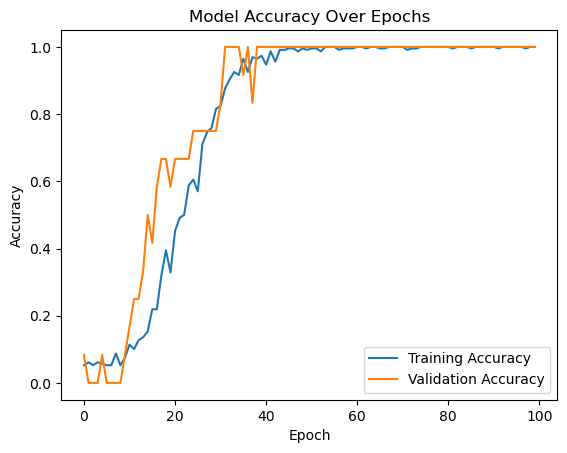

In [10]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### Plot loss history

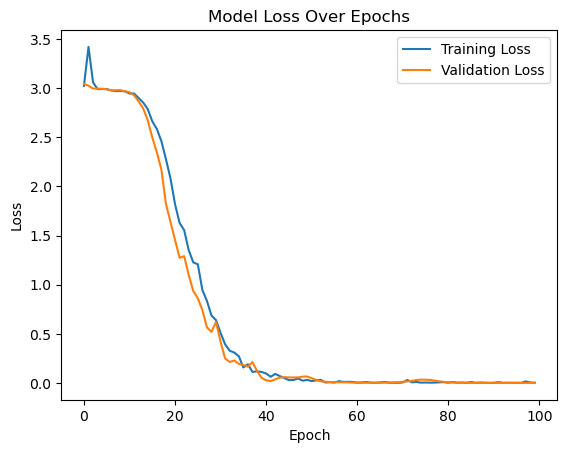

In [11]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()